In [1]:
# Setting up environment
import sys
import pandas as pd
sys.path.append("../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
import gcsfs
import math

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    13:24:58 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    13:24:58 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    13:24:58 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:38421")
client

<Client: 'tcp://127.0.0.1:38421' processes=4 threads=16, memory=125.81 GiB>

In [3]:
def reload(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}_summer_23'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        consolidated=True, 
        chunks={}) 
    return ds

In [4]:
ds_101 = reload('A101')
ds_103 = reload('A103')
ds_104 = reload('A104')


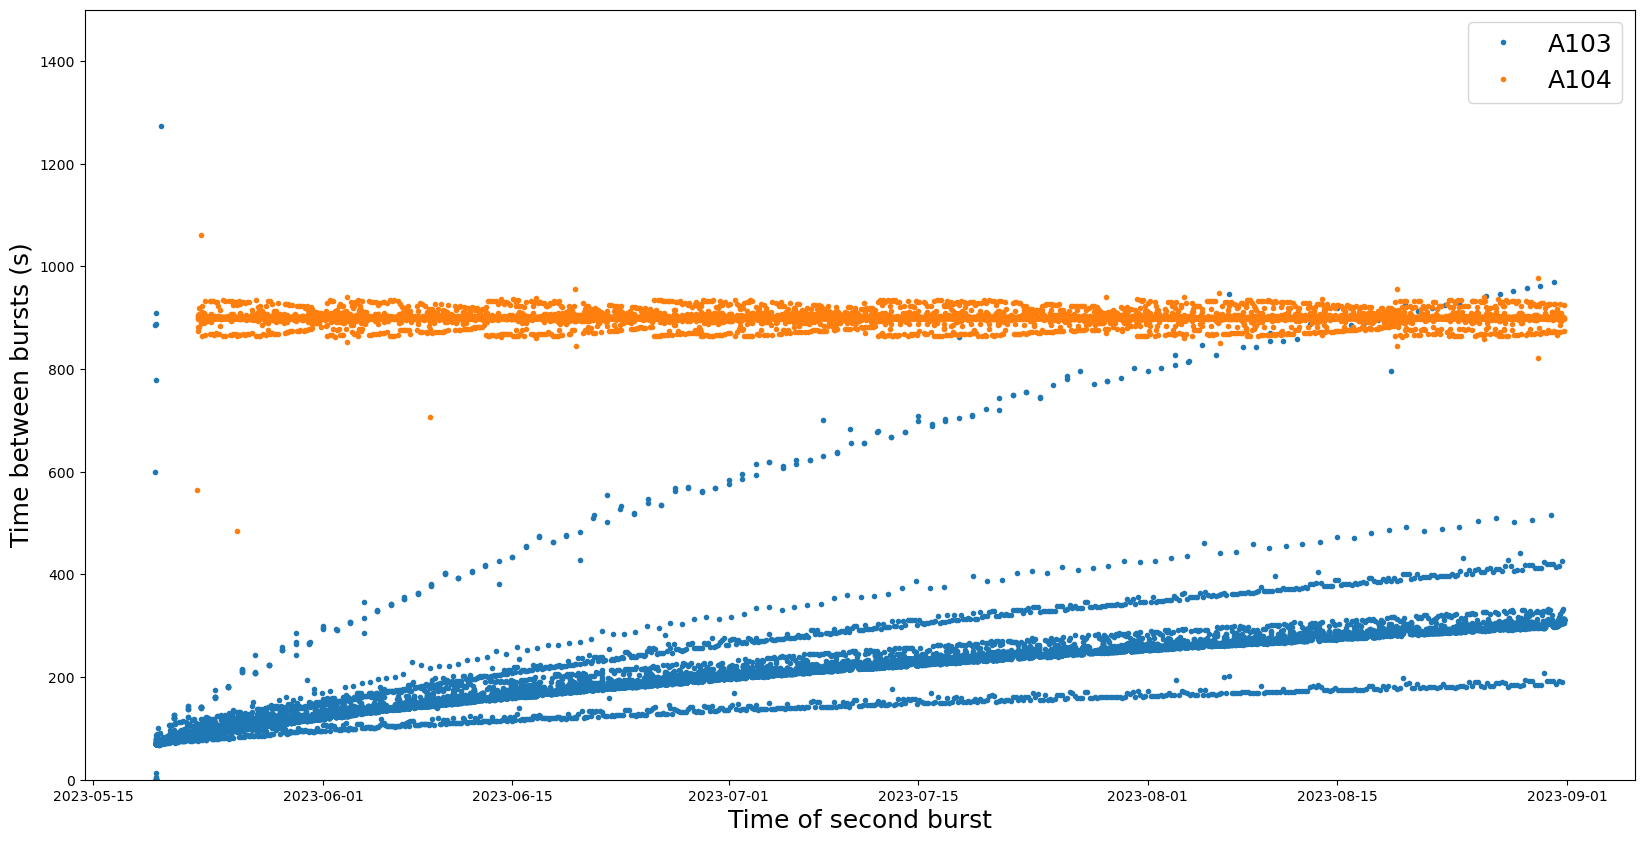

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
deltas_103 = 1e-9*(ds_103.time.values[1:]-ds_103.time.values[0:-1])
plt.plot(ds_103.time.values[1:], deltas_103,linestyle='None',marker='.',label='A103')

deltas_104 = 1e-9*(ds_104.time.values[1:]-ds_104.time.values[0:-1])
plt.plot(ds_104.time.values[1:], deltas_104,linestyle='None',marker='.',label='A104')
plt.ylim([0,1500])
plt.ylabel('Time between bursts (s)',fontsize=18)
plt.xlabel('Time of second burst',fontsize=18)
plt.legend(fontsize=18)

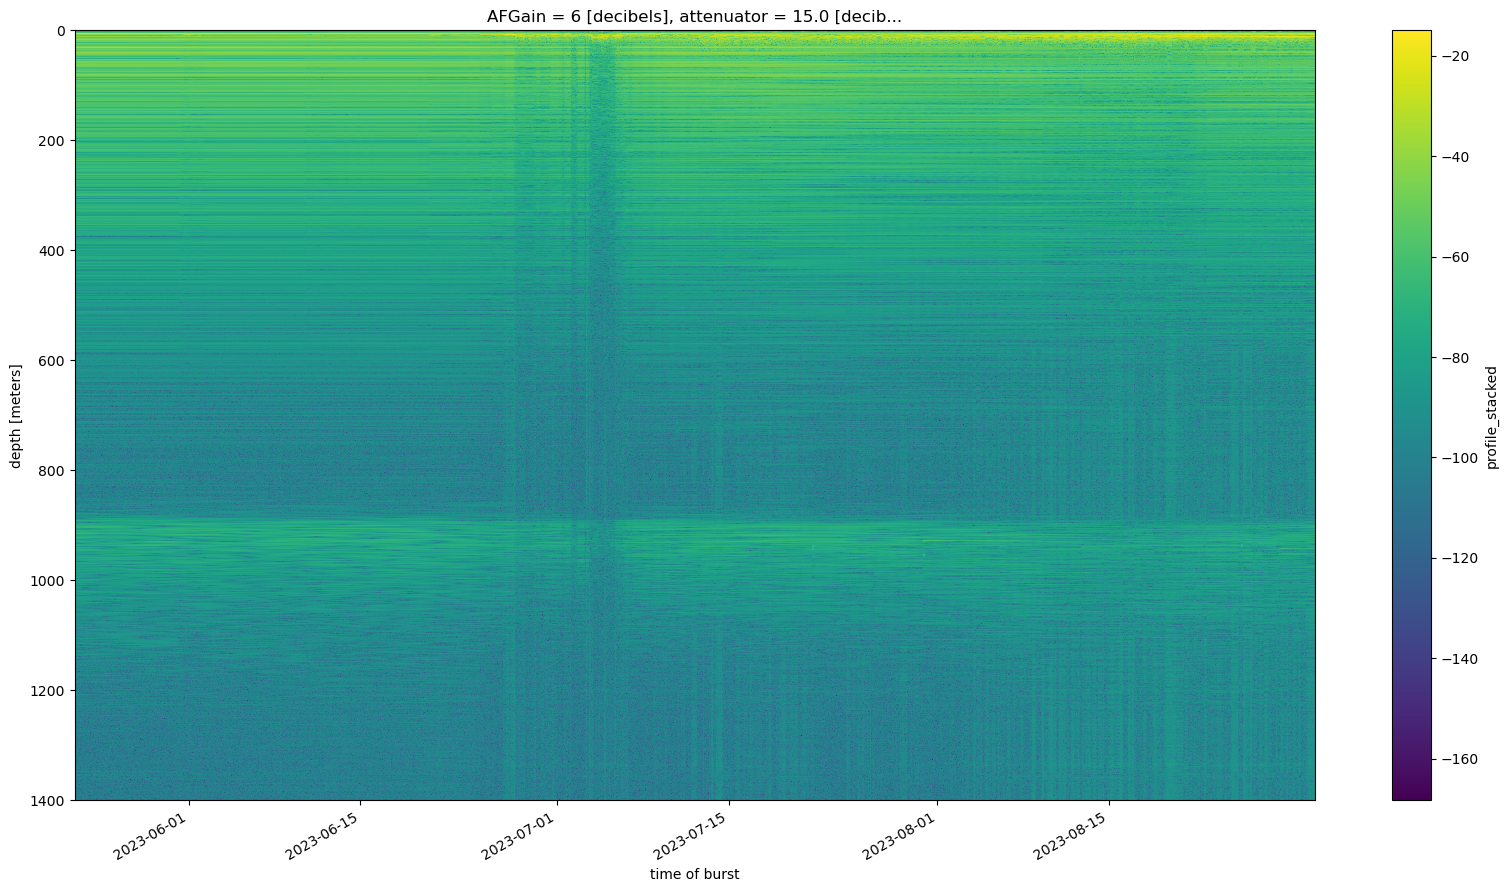

In [8]:
ds = xa.dB(ds_104.profile_stacked.isel(attenuator_setting_pair=2))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ds.plot(ax=ax,x='time')
ax.invert_yaxis()

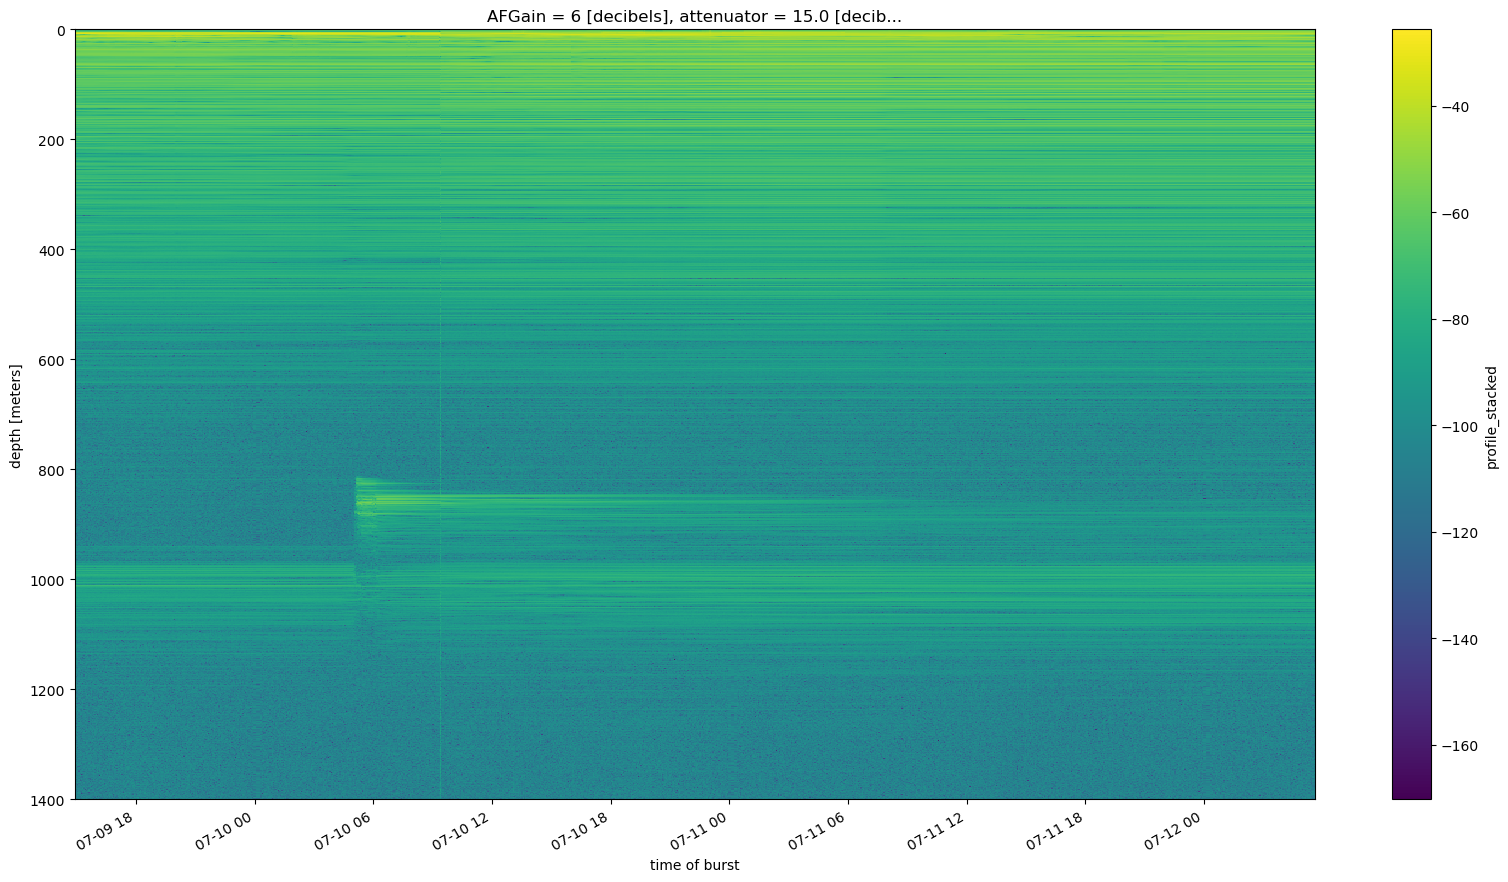

In [14]:
ds = xa.dB(ds_103.profile_stacked.isel(attenuator_setting_pair=2,time=range(30000,31000)))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ds.plot(ax=ax,x='time')
ax.invert_yaxis()

In [10]:
len(ds_103.time)

47375

In [11]:
len(ds_104.time)

9705